In [2]:
import matplotlib.pyplot as plt
import json
import os

# Model size

In [18]:
dir_open = open('../benchmark/model_size.json', "r")
model_sizes = json.load(dir_open)

In [19]:
model_sizes

{'GPT2-medium_sparsity_0%': 1377.5430603027344,
 'GPT2-medium_sparsity_10.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_50.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_90.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_95.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_99.0%': 1377.5430603027344,
 'BART-large_sparsity_0%': 1549.87890625,
 'BART-large_sparsity_10.0%': 1549.87890625,
 'BART-large_sparsity_50.0%': 1549.87890625,
 'BART-large_sparsity_90.0%': 1549.87890625,
 'BART-large_sparsity_95.0%': 1549.87890625,
 'BART-large_sparsity_99.0%': 1549.87890625,
 'BERT-large_sparsity_0%': 1272.51171875,
 'BERT-large_sparsity_10.0%': 1272.51171875,
 'BERT-large_sparsity_50.0%': 1272.51171875,
 'BERT-large_sparsity_90.0%': 1272.51171875,
 'BERT-large_sparsity_95.0%': 1272.51171875,
 'BERT-large_sparsity_99.0%': 1272.51171875}

In [11]:
model_names = ['GPT2-medium', 'BART-large', 'BERT-large']
sparsity = [0, 0.1, 0.5, 0.9, 0.95, 0.99] 

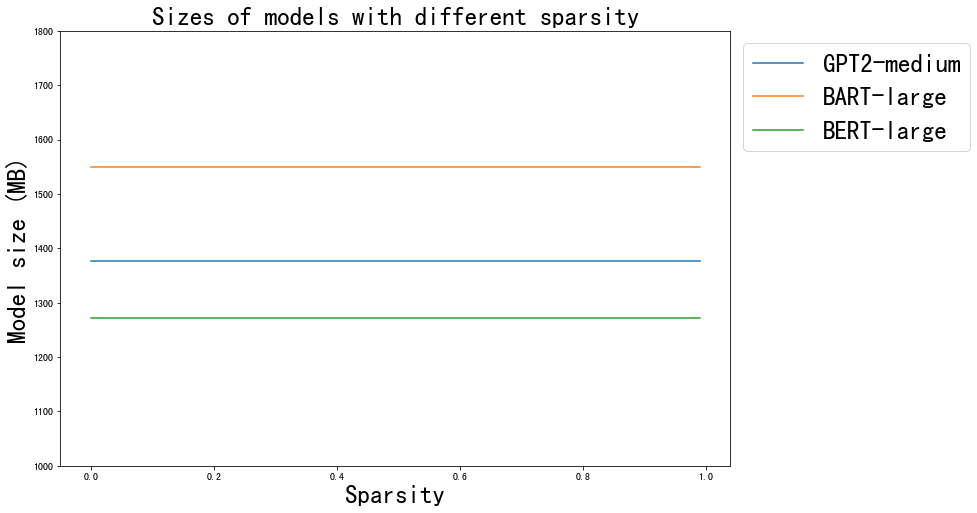

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
for model_name in model_names: 
    sizes = []
    for prune_proportion in sparsity:
        sizes.append(model_sizes[f'{model_name}_sparsity_{prune_proportion*100}%'])
    ax.plot(sparsity, sizes, label=f'{model_name}') 
plt.xlabel("Sparsity", fontsize=25)
plt.ylabel("Model size (MB)", fontsize=25)
plt.ylim([1000, 1800])
plt.title("Sizes of models with different sparsity", fontsize=25)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=25)
plt.savefig('../figs/model_size_different_sparsity.png')
plt.show()
    
        
    

# Benchmarks

## CLM

## GLUE(qnli)

This subdatasest tests whether the moel is capable of distinguishing the answer is entailment to the question or not. 